<a href="https://colab.research.google.com/github/AntonioZN23/Challenge-3-Telecom-X-parte-2/blob/main/TelecomX_Latam_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom X**

In [3]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Alura Challenge Telecom X parte 2/DataFrame_TelecomX_parte_1.csv')

In [5]:
df = df.drop(columns=['Unnamed: 0'])

## **Preparacion de datos**

In [6]:
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tiempo,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cargos Mensuales,Cargos Totales,Cargos Diarios
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tiempo            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [8]:
for i in df.index:
  if pd.isna(df['Cargos Totales'][i]):
    df.drop(i,axis='index',inplace=True)

In [9]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tiempo', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Cargos Mensuales',
       'Cargos Totales', 'Cargos Diarios'],
      dtype='object')

In [10]:
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tiempo,PhoneService,Cargos Mensuales,Cargos Totales,Cargos Diarios
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [11]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1})

/tmp/ipython-input-35551863.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'Male':0,'Female':1})


In [12]:
categoricas = df.drop(columns=['customerID','Churn','Cargos Mensuales','Cargos Totales','Cargos Diarios','SeniorCitizen','gender','Partner','Dependents','tiempo','PhoneService'])

In [13]:
df_categorias = pd.get_dummies(data=categoricas,columns=categoricas.columns,dtype=int)
df_categorias.sample(2)

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4095,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
6108,0,0,1,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0


In [14]:
#Proporcion de Abandono
df['Churn'].value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


## **Correlacion y Seleccion de variables**

In [15]:
df_completo = df_categorias.join(df[['Churn','Cargos Mensuales','Cargos Totales','SeniorCitizen','gender','Partner','Dependents','tiempo','PhoneService']])

In [16]:
corr = df[['Churn','Cargos Mensuales','Cargos Totales','SeniorCitizen','gender','Partner','Dependents','tiempo','PhoneService']].corr()

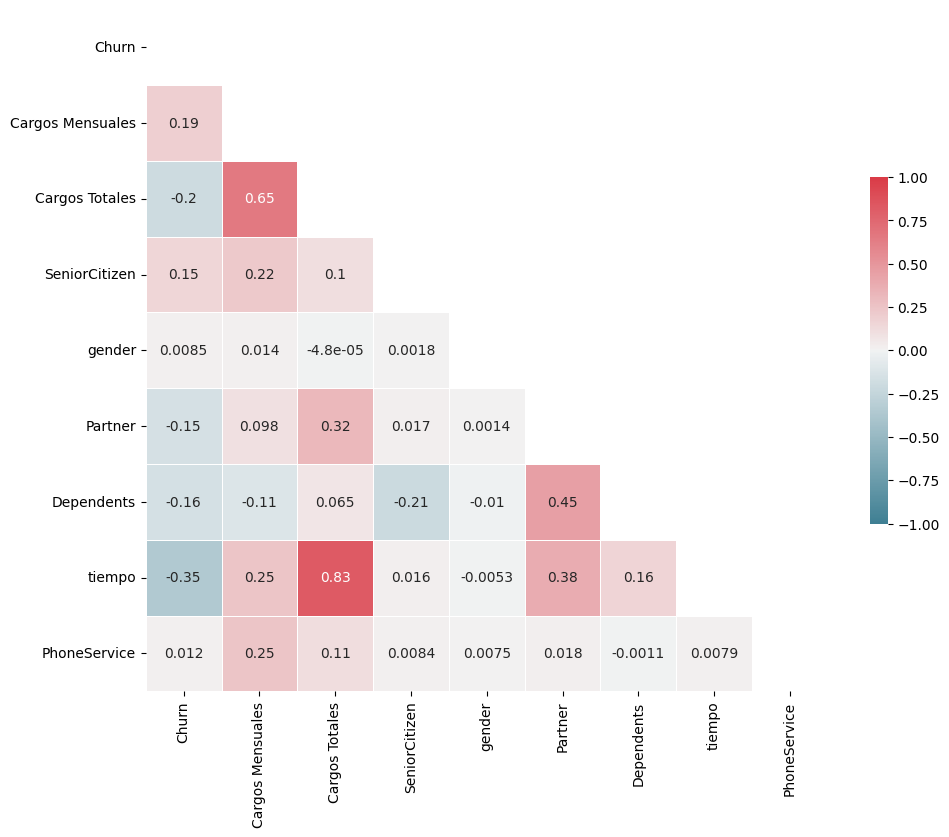

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

plt.show()

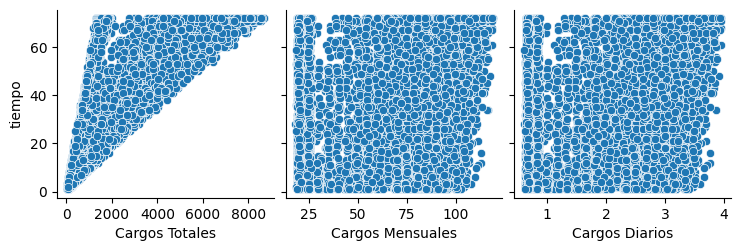

In [18]:
sns.pairplot(df,x_vars=['Cargos Totales','Cargos Mensuales','Cargos Diarios'],y_vars=['tiempo'])

In [19]:
import plotly.express as px
px.box(df_completo,x='tiempo',color='Churn',title='Tenencia vs abandono')

In [20]:
px.histogram(df_completo,x='tiempo',text_auto=True,color='Churn',barmode='group')

In [21]:
#Con esta grafica se busca demostrar el motivo por el cual se decidio sacar a Cargos Totales del DF que se utilziara para el modelo de ML
px.box(df,x='Cargos Totales',color='Churn',title='Cargos Totales vs abandono')

In [22]:
px.histogram(df_completo,x='Cargos Totales',text_auto=True,color='Churn',barmode='group')

In [23]:
px.histogram(df,x='gender',text_auto=True,color='Churn',barmode='group')

In [59]:
px.histogram(df,x='InternetService',text_auto=True,color='Churn',barmode='group')

In [61]:
px.histogram(df,x='PaymentMethod',text_auto=True,color='Churn',barmode='group')

In [63]:
px.histogram(df,x='tiempo',text_auto=True,color='Churn',barmode='group')

In [24]:
px.box(df_completo,x='Cargos Mensuales',color='Churn',title='Cargos Mensuales vs abandono')

In [25]:
px.histogram(df_completo,x='Cargos Mensuales',text_auto=True,color='Churn',barmode='group')

## **Modelo predictivo**

In [26]:
from sklearn.model_selection import train_test_split

X = df_completo.drop(columns=['Churn'])
y = df_completo['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,random_state=42)

In [27]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

dummy.score(X_test,y_test)

0.7341232227488151

### **Arbol de Decision**

In [28]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train,y_train)
modelo_arbol.score(X_test,y_test)

0.7341232227488151

In [29]:
from sklearn.tree import DecisionTreeClassifier

modelo_arbol = DecisionTreeClassifier(random_state=5,max_depth=5)
modelo_arbol.fit(X_train,y_train)
modelo_arbol.score(X_test,y_test)

0.7890995260663507

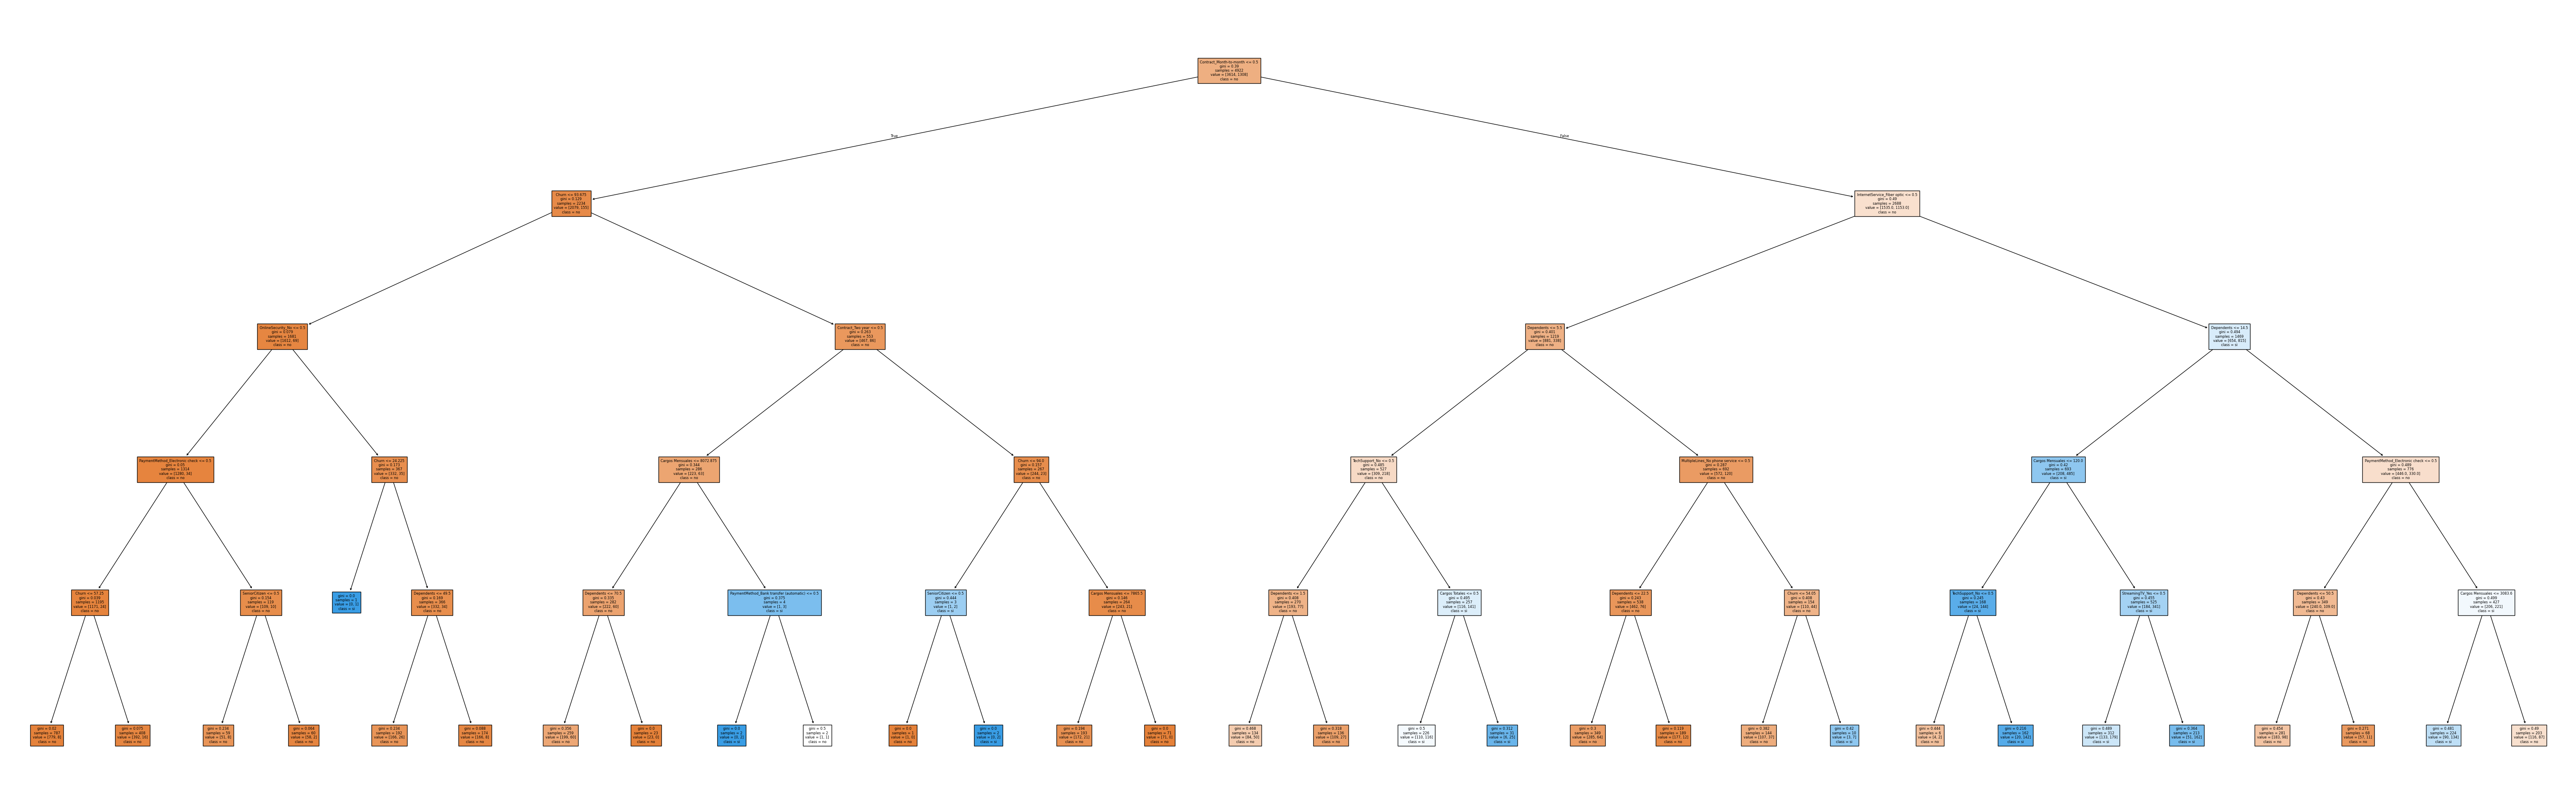

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True,class_names=['no','si'],fontsize=6,feature_names=df_completo.columns);

In [31]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo_arbol.predict(X_test)
matriz_confusion = confusion_matrix(y_test,y_previsto)
print(matriz_confusion)

[[1342  207]
 [ 238  323]]


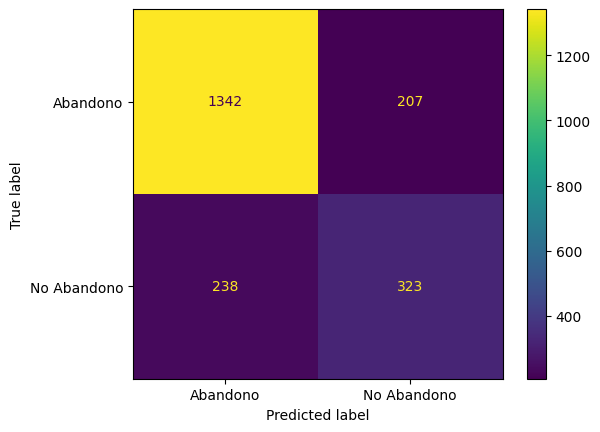

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacion = ConfusionMatrixDisplay(matriz_confusion,display_labels=['Abandono','No Abandono'])
visualizacion.plot();

In [33]:
importances = modelo_arbol.feature_importances_
feature_importances = pd.DataFrame({'Features':X.columns,'importances':(importances*100).round(2)}).sort_values('importances',ascending=False)
feature_importances

,Features,importances
24,Contract_Month-to-month,50.09
39,tiempo,16.66
4,InternetService_Fiber optic,16.29
15,TechSupport_No,3.44
34,Cargos Totales,3.27
33,Cargos Mensuales,2.97
31,PaymentMethod_Electronic check,2.71
20,StreamingTV_Yes,1.40
1,MultipleLines_No phone service,0.79
26,Contract_Two year,0.79


### **Bosque aleatorio**

In [34]:
from sklearn.ensemble import RandomForestRegressor

modelo_bosque = RandomForestRegressor(random_state=5,max_depth=7)
modelo_bosque.fit(X_train,y_train)
modelo_bosque.score(X_test,y_test)

0.3015316060743607

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



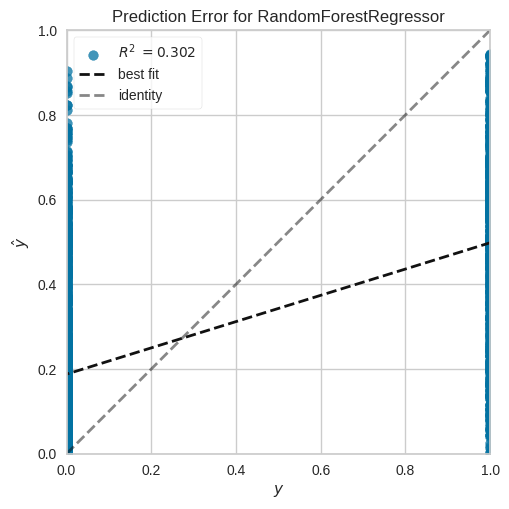

In [35]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo_bosque, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



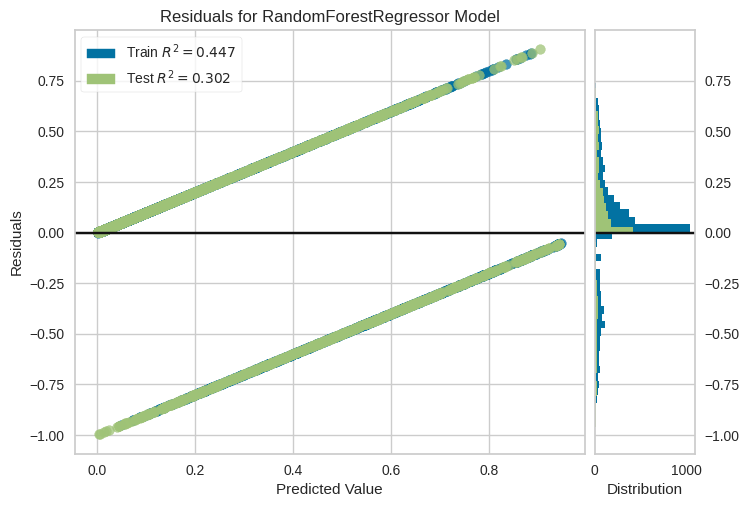

In [36]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo_bosque, X_train, y_train, X_test, y_test)

In [37]:
from sklearn.model_selection import KFold,cross_validate

scoring = {
    'RMSE':'neg_root_mean_squared_error',
    'MAE':'neg_mean_absolute_error',
    'R2':'r2'
}

cv = KFold(n_splits=5,shuffle=True,random_state=42)
cv_results = cross_validate(modelo_bosque, X_train, y_train, scoring = scoring, cv = cv)
cv_results

{'fit_time': array([1.22723961, 1.22997355, 1.22460842, 1.23880744, 1.22371149]),
 'score_time': array([0.02056599, 0.01901674, 0.01912189, 0.02182293, 0.02036357]),
 'test_RMSE': array([-0.3707652 , -0.35751198, -0.35995775, -0.36638974, -0.39954217]),
 'test_MAE': array([-0.27255857, -0.25695214, -0.26148769, -0.27009164, -0.29097576]),
 'test_R2': array([0.31070857, 0.31031706, 0.32164763, 0.33185935, 0.19449612])}

In [38]:
importances = modelo_bosque.feature_importances_

In [39]:
feature_importances = pd.DataFrame({'Features':X.columns,'importances':(importances*100).round(2)}).sort_values('importances',ascending=False)
feature_importances

,Features,importances
24,Contract_Month-to-month,35.80
39,tiempo,13.23
34,Cargos Totales,11.83
4,InternetService_Fiber optic,11.45
33,Cargos Mensuales,10.60
31,PaymentMethod_Electronic check,2.54
15,TechSupport_No,1.71
6,OnlineSecurity_No,1.22
35,SeniorCitizen,1.11
36,gender,0.94


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
resultados = pd.DataFrame(index=['RMSE','mae','R2'])
model_features = RandomForestRegressor(max_depth=5,random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0,40,2)]

def calcular_regresion(y_test,y_pred):
  rmse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  r2 = r2_score(y_test,y_pred)
  metricas = {
      'RMSE':round(rmse**(1/2),4),
      'MAE':round(mae,4),
      'R2':round(r2,4)
  }
  return metricas

for i in ct_features:
  selected_features = feature_importances['Features'].values[:i]
  X_train_sel = X_train[selected_features]
  X_test_sel = X_test[selected_features]
  model_features.fit(X_train_sel,y_train)
  y_pred = model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test,y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38
RMSE,0.4043,0.3944,0.3761,0.3727,0.3712,0.3710,0.3711,0.3711,0.3710,0.3710,0.3710,0.3706,0.3703,0.3699,0.3697,0.3697,0.3698,0.3697,0.3697,0.3697
mae,0.3294,0.3137,0.2827,0.2773,0.2763,0.2762,0.2760,0.2762,0.2760,0.2760,0.2760,0.2756,0.2756,0.2757,0.2756,0.2757,0.2757,0.2756,0.2756,0.2756
R2,0.1624,0.2032,0.2752,0.2883,0.2941,0.2949,0.2944,0.2943,0.2948,0.2947,0.2948,0.2965,0.2973,0.2991,0.2997,0.2996,0.2995,0.2997,0.2999,0.2998


In [41]:
selected_features = feature_importances['Features'].values[:27]
X_selected_features = X[selected_features]
X_selected_features

,Contract_Month-to-month,tiempo,Cargos Totales,InternetService_Fiber optic,Cargos Mensuales,PaymentMethod_Electronic check,TechSupport_No,OnlineSecurity_No,SeniorCitizen,gender,...,OnlineSecurity_Yes,StreamingTV_No,PaymentMethod_Bank transfer (automatic),StreamingTV_Yes,Contract_One year,MultipleLines_Yes,PaymentMethod_Mailed check,MultipleLines_No,PhoneService,StreamingMovies_Yes
0,0,9,593.30,0,65.60,0,0,1,0,1,...,0,0,0,1,1,0,1,1,1,0
1,1,9,542.40,0,59.90,0,1,1,0,0,...,0,1,0,0,0,1,1,0,1,1
2,1,4,280.85,1,73.90,1,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
3,1,13,1237.85,1,98.00,1,1,1,1,0,...,0,0,0,1,0,0,0,1,1,1
4,1,3,267.40,1,83.90,0,0,1,1,1,...,0,0,0,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,742.90,0,55.15,0,0,0,0,1,...,1,1,0,0,1,0,1,1,1,0
7039,1,22,1873.70,1,85.10,1,1,1,0,0,...,0,1,0,0,0,1,0,0,1,1
7040,1,2,92.75,0,50.30,0,1,1,0,0,...,0,1,0,0,0,0,1,1,1,0
7041,0,67,4627.65,0,67.85,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,1


In [42]:
X_train_selected,X_test_selected,y_train_selected,y_test_selected = train_test_split(X_selected_features,y,random_state=42)

In [43]:
param_grid = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split':[2,4,6],
    'n_estimators':[100,150,200]
}

In [44]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5,shuffle=True,random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='r2',cv=cv)
model_grid.fit(X_train_selected,y_train_selected)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [45]:
model_grid.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [46]:
y_pred_grid = model_grid.predict(X_test_selected)
metricas_model_grid = calcular_regresion(y_test_selected,y_pred_grid)
metricas_model_grid

{'RMSE': 0.373, 'MAE': 0.2774, 'R2': 0.2858}

## **Normalizando Datos**

In [47]:
from sklearn.preprocessing import MinMaxScaler

normalizacion = MinMaxScaler()
X_train_normalizada = normalizacion.fit_transform(X_train)
X_test_normalizada = normalizacion.fit_transform(X_test)

pd.DataFrame(X_train_normalizada).sample(7)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
4181,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.013433,0.132904,0.0,0.0,0.0,1.0,0.788732,1.0
1725,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.712438,0.354598,0.0,0.0,1.0,1.0,0.464789,1.0
4496,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.399502,0.109174,1.0,0.0,0.0,0.0,0.239437,1.0
2502,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.566169,0.058412,0.0,1.0,0.0,0.0,0.084507,1.0
2119,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.602488,0.397127,0.0,1.0,1.0,0.0,0.591549,1.0
1881,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.068159,0.196884,0.0,0.0,0.0,0.0,0.901408,1.0
3469,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.845771,0.692228,0.0,0.0,0.0,0.0,0.802817,1.0


### **KNN**

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_normalizada,y_train)

KNeighborsClassifier()

In [49]:
knn.score(X_test_normalizada,y_test)

0.7578199052132701

## **Análisis de modelos**

In [50]:
modelos = [('dummy',dummy,X_test),('Árbol',modelo_arbol,X_test),('KNN',knn,X_test_normalizada),('Bosque selectivo',model_grid,X_test_selected)]
evaluacion2 = cross_validate(modelo_bosque, X_train, y_train, scoring={'R2':'r2'}, cv = cv)
resultado_ev = evaluacion2['test_R2']

for i in modelos[:3]:
  print(f'La exactitud del modelo {i[0]} : {round(i[1].score(i[2],y_test),2)}')
print(f'La exactitud del modelo {modelos[3][0]} : {round(modelos[3][1].score(modelos[3][2],y_test_selected),2)}')
print(f'La exactitud del modelo Bosque aleatorio : {round(resultado_ev.max(),2)}')

La exactitud del modelo dummy : 0.73
La exactitud del modelo Árbol : 0.79
La exactitud del modelo KNN : 0.76
La exactitud del modelo Bosque selectivo : 0.29
La exactitud del modelo Bosque aleatorio : 0.33


## **Modelo campeon**

In [51]:
import pickle

try:
    with open('modelo_champion.pkl','wb') as archivo:
      pickle.dump(modelo_arbol,archivo)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


# **Informe**

A lo largo del presente reporte se han realizado observaciones en la información que corroboran la hipótesis propuesta en el primer informe realizado a la compañía Telecom X, donde se estableció que las variables con mayor impacto en la decisión de los clientes para abandonar o no la empresa radica en el tipo de contrato, el tiempo de tenencia del servicio, así como los cargos totales y mensuales, entre otros.

A partir de la generación de modelos de Machine Learning de tipo categóricos, específicamente los modelos de árbol y bosque aleatorio, se estableció que las principales variables que influyen en la predicción de la estadía o abandono de un cliente es principalmente atribuible al tipo de contrato, el tiempo, los cargos y el tipo de servicio de internet. Lo de que demuestra que si el cliente cuenta con un contrato de mes a mes, tiene un tiempo de tenencia baja, los cargos totales son bajos pero cuenta con cargos mes a mes mayores, y además, cuenta con servicio de internet de fibra óptica, la tendencia será el abandono de la empresa.

Ante esta situación las acciones que se deberán tomar para retener a los clientes radica en la generación de un programa de fidelidad que resulte más atractivo a los clientes, de este modo, se busca que aquellos clientes con contrato mes a mes reduzcan su índice de deserción y de ser posible, se deberá buscar que los clientes en este campo migren a planes de mayor tiempo, los cuales cuentan con menor impacto al momento de determinar si un cliente abandonará o no la empresa.

La siguiente acción a tomar para retener a los clientes es la mejora del sistema de fibra óptica, pues se observó que los clientes que cuentan con este servicio tienen mayor tendencia a abandonar la empresa, lo cual implica que no se encuentran conformes con la calidad del servicio proporcionado.

Para resolver el abandono de los clientes de poco tiempo en la empresa, se deberá generar promociones que resulten atractivas para los nuevos clientes, de tal modo que su estadía supere los primeros meses cuando existe una mayor cantidad de deserción.

Se generó un modelo capaz de predecir con éxito en un 79% si los clientes podrían abandonar o no la empresa, se propone implementar este modelo para buscar retener al cliente mediante promociones y programas.

Teniendo en mente las variables que mayormente influyen en la determinación del abandono o estadía de los clientes, así como las acciones a tomar, se procede a hablar sobre los modelos generados para funcionar como un apoyo a la empresa. En primera instancia es importante mencionar que se generaron 4 modelos predictivos y una línea base, el desempeño de estos modelos es 79% para un modelo de árbol de clasificación, 76% para el modelo de KNN, 29% para un bosque aleatorio optimizado y 33% para un bosque aleatorio sin optimizar, finalmente se cuenta con un rendimiento del 73% para la línea base.

De esta manera, se establece que el mejor modelo realizado para la predicción de una potencial deserción de un cliente es un modelo de árbol de clasificación, pues es el modelo que cuenta con una mayor aproximación.